##### 과제: 피마 인디언 당뇨병 데이터

###### - 1. 결정 트리와 SVM으로 학습 및 예측 수행 후 혼돈행렬, 정확도, 정밀도, 재현율, F1 Score 계산

###### - 2. 결정 트리에서 max_depth, min_samples_split, min_samples_leaf 값을 하나씩 선택하여 그래프 표현

###### - 3. 두 모델에 대해 GridSearchCV 사용하여 best가 되는 경우 파라미터 값과 그떄의 정확도 계싼

1. 결정 트리, SVM 학습 및 예측 결과

In [1]:
# 피마 인디언 데이터 로드
import pandas as pd
df = pd.read_csv('./pima-indians-diabetes.csv', skiprows=9, header=None)
df.columns = ['preg_cnt', 'glucose', 'blood_press', 'skin_thick', 'insulin', 'bmi', 'diabetes_func', 'age', 'class']
df.head()

,preg_cnt,glucose,blood_press,skin_thick,insulin,bmi,diabetes_func,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 결측치 확인
df.isna().sum()

preg_cnt         0
glucose          0
blood_press      0
skin_thick       0
insulin          0
bmi              0
diabetes_func    0
age              0
class            0
dtype: int64

In [3]:
# 변수 분류
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
# 데이터 표준화
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_scaled = mmscaler.fit_transform(X)

In [5]:
# 학습 및 테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=2022)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [7]:
# 결정 트리 학습 및 결과
dtc = DecisionTreeClassifier(random_state=2022)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

In [8]:
# 혼돈 행렬
confusion_matrix(y_test,pred_dtc)

array([[74, 26],
       [21, 33]], dtype=int64)

In [9]:
# 정확도
accuracy_score(y_test,pred_dtc)

0.6948051948051948

In [10]:
# 정밀도
precision_score(y_test,pred_dtc)

0.559322033898305

In [11]:
# 재현율
recall_score(y_test,pred_dtc)

0.6111111111111112

In [12]:
# f1 스코어
f1_score(y_test,pred_dtc)

0.5840707964601771

In [13]:
# SVC 학습 및 결과
svc = SVC(random_state=2022)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [14]:
# 혼돈 행렬
confusion_matrix(y_test,pred_svc)

array([[81, 19],
       [20, 34]], dtype=int64)

In [15]:
# 정확도
accuracy_score(y_test,pred_svc)

0.7467532467532467

In [16]:
# 정밀도
precision_score(y_test,pred_svc)

0.6415094339622641

In [17]:
# 재현율
recall_score(y_test,pred_svc)

0.6296296296296297

In [18]:
# f1스코어
f1_score(y_test,pred_svc)

0.6355140186915889

2. 결정 트리 모델 하이퍼파라미터 조정 후 그래프 그리기

In [19]:
# 결정트리 모델 하이퍼파라미터 조정
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=2022)
dtc2.fit(X_train,y_train)
dtc3 = DecisionTreeClassifier(min_samples_split=3, random_state=2022)
dtc3.fit(X_train,y_train)
dtc4 = DecisionTreeClassifier(min_samples_leaf=3, random_state=2022)
dtc4.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=2022)

In [20]:
# 모델별 그래프 그리기
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

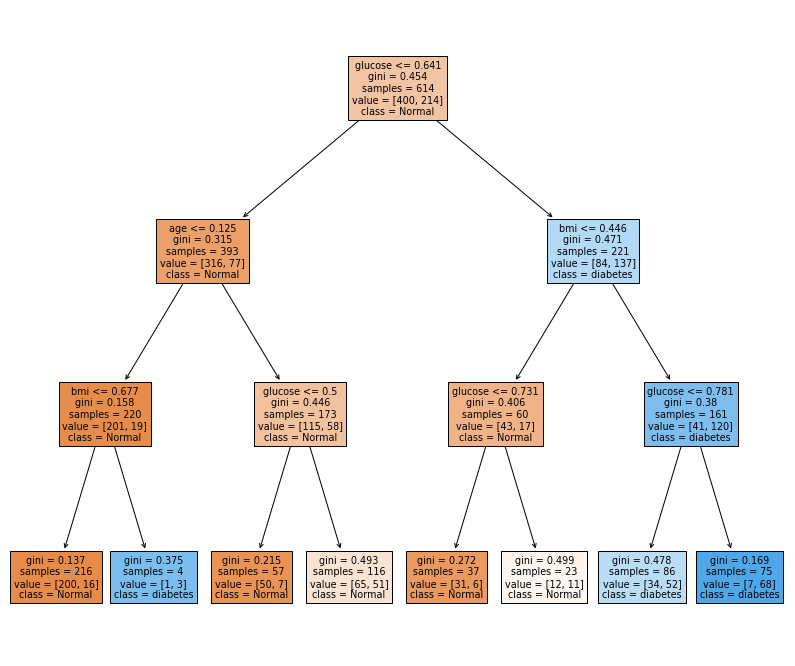

In [21]:
# max_depth 모델 그래프
plt.figure(figsize=(14,12))
plot_tree(dtc2, feature_names=df.columns[:-1], class_names=['Normal','diabetes'], filled=True)
plt.show()

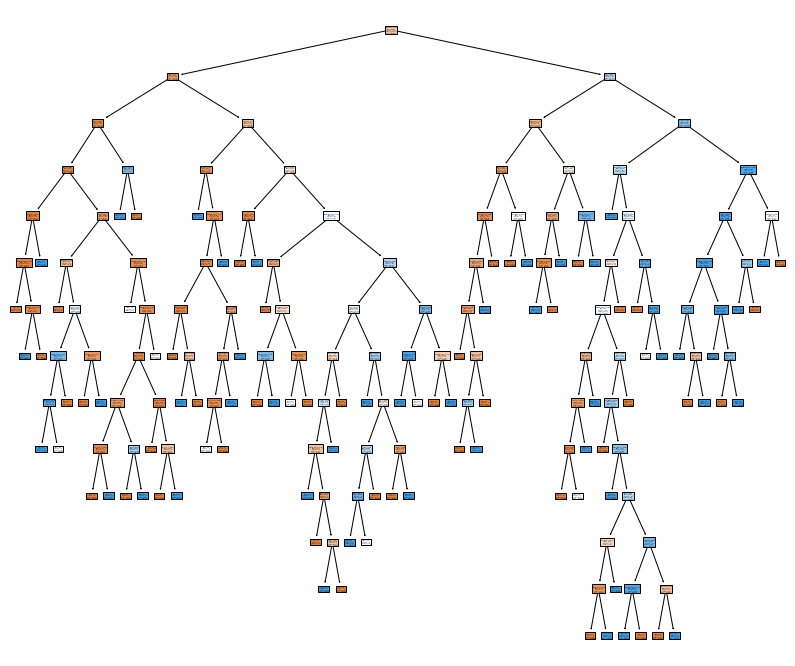

In [22]:
# min_samples_split 모델 그래프
plt.figure(figsize=(14,12))
plot_tree(dtc3, feature_names=df.columns[:-1], class_names=['Normal','diabetes'], filled=True)
plt.show()

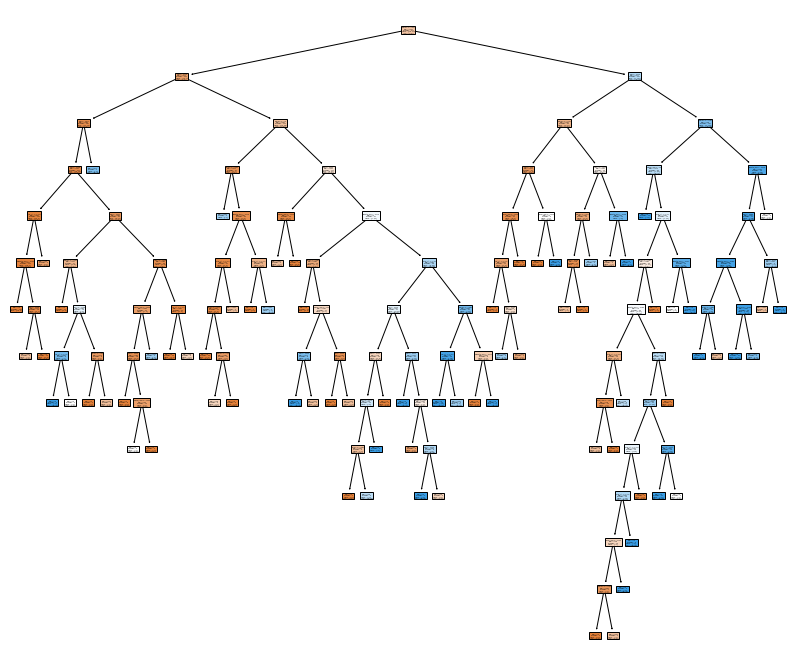

In [23]:
# min_samples_leaf 모델 그래프
plt.figure(figsize=(14,12))
plot_tree(dtc4, feature_names=df.columns[:-1], class_names=['Normal','diabetes'], filled=True)
plt.show()

3. GridSearch를 활용하여 결정 트리 모델과 서포트 벡터 머신 모델 만들기

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# 결정트리 GridSearch
dtc_params = {'max_depth':[2,4,6,8], 'min_samples_split':[2,4,6,8]}

grid_dtc = GridSearchCV(dtc, dtc_params, scoring='accuracy', cv=5)
grid_dtc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [26]:
grid_dtc.best_params_

{'max_depth': 6, 'min_samples_split': 2}

In [27]:
best_dtc = grid_dtc.best_estimator_
best_dtc.score(X_test,y_test)

0.6623376623376623

In [28]:
# SVM GridSearch
svc_params = {'C':[0.1,1.0,10.0,100.0]}

grid_svc = GridSearchCV(svc, svc_params, scoring='accuracy', cv=5)
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2022),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0]}, scoring='accuracy')

In [29]:
grid_svc.best_params_

{'C': 10.0}

In [30]:
best_svc = grid_svc.best_estimator_
best_svc.score(X_test,y_test)

0.7337662337662337